In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\Fifa_Worldcup_2022_Groups.csv')
rk = pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\fifa_ranking-2022-10-06.csv')
mt=pd.read_csv(r'C:\Users\Yasmine Daly\Desktop\results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Group                 32 non-null     object
 1   Flag_Image            32 non-null     object
 2   Team                  32 non-null     object
 3   Country_Name_Short    32 non-null     object
 4   First match against   32 non-null     object
 5   Second match against  32 non-null     object
 6   Third match against   32 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [4]:
df.head(10)

,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales
5,B,https://cloudinary.fifa.com/api/v3/picture/fla...,Iran,IRN,England,Wales,USA
6,B,https://cloudinary.fifa.com/api/v3/picture/fla...,USA,USA,Wales,England,Iran
7,B,https://cloudinary.fifa.com/api/v3/picture/fla...,Wales,WAL,USA,Iran,England
8,C,https://cloudinary.fifa.com/api/v3/picture/fla...,Argentina,ARG,Saudi Arabia,Mexico,Poland
9,C,https://cloudinary.fifa.com/api/v3/picture/fla...,Saudi Arabia,KSA,Argentina,Poland,Mexico


In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().sum()

Group                   0
Flag_Image              0
Team                    0
Country_Name_Short      0
First match against     0
Second match against    0
Third match against     0
dtype: int64

In [7]:
df['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [8]:
rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [9]:
rk.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,12/31/1992
1,96,Syria,SYR,11.0,0.0,0,AFC,12/31/1992
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,12/31/1992
3,99,Latvia,LVA,10.0,0.0,0,UEFA,12/31/1992
4,100,Burundi,BDI,10.0,0.0,0,CAF,12/31/1992
5,101,Togo,TOG,10.0,0.0,0,CAF,12/31/1992
6,102,Angola,ANG,10.0,0.0,0,CAF,12/31/1992
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,12/31/1992
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,12/31/1992
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,12/31/1992


In [10]:
mt.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
rk['country_abrv'].unique()

array(['GER', 'SYR', 'BFA', 'LVA', 'BDI', 'TOG', 'ANG', 'SUR', 'LUX',
       'VIN', 'FIJ', 'MOZ', 'IDN', 'ATG', 'JOR', 'SWZ', 'FRO', 'LTU',
       'UGA', 'PRK', 'PER', 'SLE', 'TAN', 'NIG', 'IRQ', 'GUA', 'LBR',
       'ETH', 'ALB', 'BOL', 'BHR', 'SGP', 'CGO', 'MAS', 'SDN', 'CRO',
       'BRB', 'YEM', 'CPV', 'SOL', 'LBY', 'BOT', 'BRU', 'DOM', 'LES',
       'IND', 'CUB', 'PAK', 'BLR', 'SEY', 'CTA', 'NEP', 'GAM', 'MTN',
       'KEN', 'BAN', 'SVN', 'OMA', 'GNB', 'LCA', 'HKG', 'PAN', 'GRN',
       'PUR', 'TAH', 'RSA', 'VEN', 'SMR', 'BEN', 'GUY', 'UKR', 'HAI',
       'EST', 'THA', 'MRI', 'MLT', 'EGY', 'CMR', 'SCO', 'USA', 'MEX',
       'BUL', 'CIV', 'WAL', 'YUG', 'ALG', 'GRE', 'ZAM', 'POR', 'AUT',
       'COL', 'BEL', 'HUN', 'TCH', 'URU', 'MAD', 'ITA', 'BRA', 'SWE',
       'ENG', 'IRL', 'NED', 'RUS', 'DEN', 'ARG', 'ROU', 'SUI', 'NGA',
       'NOR', 'ESP', 'FRA', 'CRC', 'POL', 'CYP', 'CAN', 'BER', 'UAE',
       'ZAI', 'IRN', 'GUI', 'ISR', 'ECU', 'JPN', 'JAM', 'PAR', 'MLI',
       'NZL', 'KUW',

In [12]:
result = rk.groupby('country_abrv')['total_points'].sum()

In [13]:
result

country_abrv
AFG     55322.70
AIA     33264.44
ALB    162745.60
ALG    192109.31
AND     66876.16
         ...    
YEM     85187.46
YUG     33665.00
ZAI      7344.00
ZAM    163424.78
ZIM    136368.81
Name: total_points, Length: 217, dtype: float64

In [14]:
mt['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

In [15]:
mt.shape

(44060, 9)

In [16]:
mt = mt[mt['tournament'] != 'Friendly']
mt.shape

(26635, 9)

In [17]:
rk['rank_date'] = pd.to_datetime(rk['rank_date'])
mt['date'] = pd.to_datetime(mt['date'])

In [18]:
import datetime

rk['year'] = rk['rank_date'].dt.year
mt['year'] = mt['date'].dt.year
rankings_sub = rk[rk['rank_date'] > '2017-08-24']
matches_sub = mt[mt['date'] > '2017-08-24']

In [19]:
rankings_sub = rankings_sub[['rank', 'country_full', 'total_points', 'year']]
rankings_sub = rankings_sub.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'total_points': 'mean'})

matches_sub.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
39453,2017-08-29,United Arab Emirates,Saudi Arabia,2.0,1.0,FIFA World Cup qualification,Al Ain,United Arab Emirates,False,2017
39455,2017-08-31,France,Gibraltar,9.0,0.0,FIFA World Cup qualification,Liège,France,False,2017
39456,2017-08-31,Brazil,Ecuador,2.0,0.0,FIFA World Cup qualification,Porto Alegre,Brazil,False,2017
39457,2017-08-31,Bulgaria,Sweden,3.0,2.0,FIFA World Cup qualification,Sofia,Bulgaria,False,2017
39458,2017-08-31,Chile,Paraguay,0.0,3.0,FIFA World Cup qualification,Santiago,Chile,False,2017


In [20]:
matches_all = matches_sub.merge(rankings_sub, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all = matches_all.merge(rankings_sub, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
matches_all.drop(['date', 'tournament', 'city', 'country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
matches_all.head()

,home_team,away_team,home_score,away_score,neutral,rank_x,total_points_x,rank_y,total_points_y
0,United Arab Emirates,Saudi Arabia,2.0,1.0,False,72.50,479.50,60.5,574.75
1,United Arab Emirates,Saudi Arabia,0.0,0.0,True,72.50,479.50,60.5,574.75
2,Kuwait,Saudi Arabia,1.0,2.0,False,186.00,59.25,60.5,574.75
3,France,Cyprus,4.0,0.0,False,5.00,1312.00,84.5,410.50
4,Estonia,Cyprus,1.0,0.0,False,84.25,411.50,84.5,410.50


In [21]:
matches_all['total_diff'] = matches_all['total_points_x'] - matches_all['total_points_y']
matches_all['rank_diff'] = matches_all['rank_x'] - matches_all['rank_y']
matches_all['neutral'] = matches_all['neutral'].astype(int)
matches_all['is_win'] = (matches_all['home_score'] - matches_all['away_score']).apply(lambda x: 1 if x>0 else 0)
train = matches_all.drop(['home_team', 'away_team', 'home_score', 'away_score'], axis=1)
train.head()

,neutral,rank_x,total_points_x,rank_y,total_points_y,total_diff,rank_diff,is_win
0,0,72.50,479.50,60.5,574.75,-95.25,12.00,1
1,1,72.50,479.50,60.5,574.75,-95.25,12.00,0
2,0,186.00,59.25,60.5,574.75,-515.50,125.50,0
3,0,5.00,1312.00,84.5,410.50,901.50,-79.50,1
4,0,84.25,411.50,84.5,410.50,1.00,-0.25,1


In [22]:
train_X = train.drop('is_win', axis=1)
train_y = train['is_win']

In [23]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
classifiers = {'Random Forest': RandomForestClassifier(n_estimators=300),
              'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=.01),
              'Logistic Regression': LogisticRegression(C=1e-5)}

Running Random Forest
Running LightGBM
Running Logistic Regression


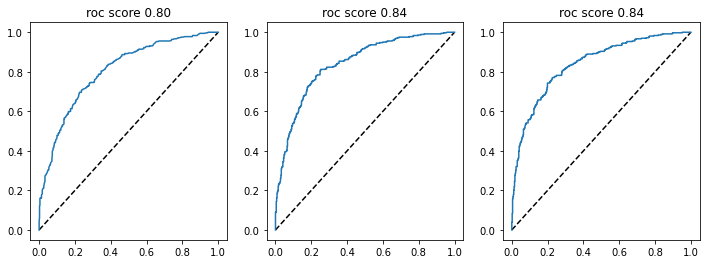

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3)

fig = plt.figure(figsize=[12, 4])
for i, (name, clf) in enumerate(classifiers.items()):
    print('Running', name)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    # plot
    ax = fig.add_subplot(1, 3, i+1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('roc score {0:.2f}'.format(roc_auc_score(y_test, y_pred)))

<AxesSubplot:title={'center':'y_pred'}, xlabel='[y_true]'>

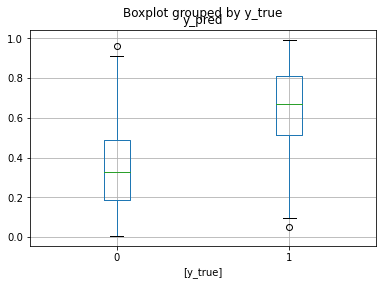

In [27]:
pd.DataFrame({'y_pred': y_pred, 'y_true': y_test}).boxplot(by='y_true')

In [28]:
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(train_X, train_y)

lr = LogisticRegression(C=1e-5)
lr = lr.fit(train_X, train_y)

lgb = LGBMClassifier(n_estimators=300, learning_rate=.01)
lgb = lgb.fit(train_X, train_y)

Strong team not always wins, higher probability only gives better wining chance

In [29]:
world_cup_rankings = df[['Team', 'Group']]
world_cup_rankings = world_cup_rankings.merge(rankings_sub[rankings_sub['year']==2022], left_on='Team', right_on='country_full')
world_cup_rankings.drop('country_full', axis=1, inplace=True)
world_cup_rankings = world_cup_rankings.set_index('Team')
world_cup_rankings.head()

,Group,year,rank,total_points
Team,,,,
Qatar,A,2022,50.0,1440.518
Ecuador,A,2022,44.4,1460.626
Senegal,A,2022,18.4,1586.872
Netherlands,A,2022,8.8,1673.144
England,B,2022,5.0,1744.124


In [30]:
world_cup_rankings['Points'] = 0
for group in world_cup_rankings['Group'].unique():
    print('*******************************')
    print('Simulating Group', group)
    group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
    for home, away in combinations(group_teams, 2):
        print('//*************************//')
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = world_cup_rankings.loc[home, 'total_points']
        row['rank_x'] = world_cup_rankings.loc[home, 'rank']
        row['total_points_y'] = world_cup_rankings.loc[away, 'total_points']
        row['rank_y'] = world_cup_rankings.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
        # if y_pred in [0.4, 0.55] then draw
        if (y_pred > 0.4) & (y_pred < 0.55):
            print('Draw')
            world_cup_rankings.loc[home, 'Points'] += 1
            world_cup_rankings.loc[away, 'Points'] += 1
        else:
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                world_cup_rankings.loc[home, 'Points'] += 3
                print('{} wins!'.format(home))
            else:
                world_cup_rankings.loc[away, 'Points'] += 3
                print('{} wins!'.format(away))

*******************************
Simulating Group A
//*************************//
Qatar vs Ecuador
Draw
//*************************//
Qatar vs Senegal
Senegal wins!
//*************************//
Qatar vs Netherlands
Netherlands wins!
//*************************//
Ecuador vs Senegal
Senegal wins!
//*************************//
Ecuador vs Netherlands
Netherlands wins!
//*************************//
Senegal vs Netherlands
Netherlands wins!
*******************************
Simulating Group B
//*************************//
England vs USA
USA wins!
//*************************//
England vs Wales
England wins!
//*************************//
USA vs Wales
Wales wins!
*******************************
Simulating Group C
//*************************//
Argentina vs Saudi Arabia
Argentina wins!
//*************************//
Argentina vs Mexico
Mexico wins!
//*************************//
Argentina vs Poland
Poland wins!
//*************************//
Saudi Arabia vs Mexico
Mexico wins!
//***********************

In [31]:
world_cup_rankings

,Group,year,rank,total_points,Points
Team,,,,,
Qatar,A,2022,50.0,1440.518,1
Ecuador,A,2022,44.4,1460.626,1
Senegal,A,2022,18.4,1586.872,6
Netherlands,A,2022,8.8,1673.144,9
England,B,2022,5.0,1744.124,3
USA,B,2022,14.4,1634.912,3
Wales,B,2022,19.0,1580.034,3
Argentina,C,2022,3.4,1769.460,3
Saudi Arabia,C,2022,51.8,1437.580,0


In [32]:
final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
final_teams.set_index('Team', inplace=True)
final_teams

,Group,year,rank,total_points,Points
Team,,,,,
Netherlands,A,2022,8.8,1673.144,9
Senegal,A,2022,18.4,1586.872,6
England,B,2022,5.0,1744.124,3
USA,B,2022,14.4,1634.912,3
Poland,C,2022,26.4,1543.154,9
Mexico,C,2022,11.6,1650.150,6
Denmark,D,2022,10.0,1661.130,5
Tunisia,D,2022,32.2,1502.596,5
Germany,E,2022,11.2,1653.398,7


In [33]:
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]

In [34]:
final_teams = final_teams.iloc[pairing]

finals = ['round_of_16', 'quarterfinal', 'semifinal']
for f in finals:
    print('######################################')
    print('Simulation of {}'.format(f))
    winners = []
    rds = int(len(final_teams)/2)
    for i in range(rds):
        home = final_teams.index[2*i]
        away = final_teams.index[2*i+1]
        print('{} vs {}'.format(home, away))
        row = pd.DataFrame(columns=train_X.columns)
        row.loc[0, 'neutral'] = 1
        row['total_points_x'] = final_teams.loc[home, 'total_points']
        row['rank_x'] = final_teams.loc[home, 'rank']
        row['total_points_y'] = final_teams.loc[away, 'total_points']
        row['rank_y'] = final_teams.loc[away, 'rank']
        row['total_diff'] = row['total_points_x'] - row['total_points_y']
        row['rank_diff'] = row['rank_x'] - row['rank_y']
        # get wining probability
        y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
       
         # give a sense of randomness
        is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
        if is_win:
            winners.append(home)
            print('{} wins!'.format(home))
        else:
            winners.append(away)
            print('{} wins!'.format(away))
    final_teams = final_teams.loc[winners]
print('*******************************')
print('The Champion of 2022 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))

######################################
Simulation of round_of_16
Netherlands vs USA
Netherlands wins!
Poland vs Tunisia
Poland wins!
Senegal vs England
England wins!
Mexico vs Denmark
Mexico wins!
Germany vs Croatia
Croatia wins!
Switzerland vs Uruguay
Uruguay wins!
Japan vs Belgium
Belgium wins!
Brazil vs Portugal
Portugal wins!
######################################
Simulation of quarterfinal
Netherlands vs Poland
Poland wins!
England vs Mexico
England wins!
Croatia vs Uruguay
Croatia wins!
Belgium vs Portugal
Portugal wins!
######################################
Simulation of semifinal
Poland vs England
England wins!
Croatia vs Portugal
Portugal wins!
*******************************
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!


### So one simulation may have some kind of accident, compile the whole simulation process to perform multiple simulations

In [35]:
def pred_wining(dat, home, away):
    row = pd.DataFrame(columns=train_X.columns)
    row.loc[0, 'neutral'] = 1
    row['total_points_x'] = dat.loc[home, 'total_points']
    row['rank_x'] = dat.loc[home, 'rank']
    row['total_points_y'] = dat.loc[away, 'total_points']
    row['rank_y'] = dat.loc[away, 'rank']
    row['total_diff'] = row['total_points_x'] - row['total_points_y']
    row['rank_diff'] = row['rank_x'] - row['rank_y']
    
    y_pred = np.mean([lr.predict_proba(row)[:, 1][0], lgb.predict_proba(row.values)[:, 1][0], rf.predict_proba(row)[:, 1][0]])
    return y_pred

def main():
    # Group Stage
    world_cup_rankings['Points'] = 0
    for group in world_cup_rankings['Group'].unique():
        group_teams = list(world_cup_rankings.query('Group=="{}"'.format(group)).index)
        for home, away in combinations(group_teams, 2):
            # get wining probability
            y_pred = pred_wining(world_cup_rankings, home, away)
            # if y_pred in [0.4, 0.55] then draw
            if (y_pred > 0.4) & (y_pred < 0.55):
                world_cup_rankings.loc[home, 'Points'] += 1
                world_cup_rankings.loc[away, 'Points'] += 1
            else:
                # give a sense of randomness
                is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
                if is_win:
                    world_cup_rankings.loc[home, 'Points'] += 3
                else:
                    world_cup_rankings.loc[away, 'Points'] += 3
    # Eliminating Stage
    final_teams = world_cup_rankings.sort_values(by=['Group', 'Points'], ascending=False).reset_index()
    final_teams = final_teams.groupby('Group').apply(lambda x: x.iloc[[0, 1]]).reset_index(drop=True)
    final_teams.set_index('Team', inplace=True)
    final_teams = final_teams.iloc[pairing]
    
    for f in finals:
        winners = []
        rds = int(len(final_teams)/2)
        for i in range(rds):
            home = final_teams.index[2*i]
            away = final_teams.index[2*i+1]
            y_pred = pred_wining(world_cup_rankings, home, away)
            # give a sense of randomness
            is_win = np.random.choice([1, 0], p=[y_pred, 1-y_pred])
            if is_win:
                winners.append(home)
            else:
                winners.append(away)
        final_teams = final_teams.loc[winners]
    print('The Champion of 2022 World Cup is {}!!!!!!!!!!!!!!!!!!!!!!!'.format(winners[0]))
    return winners[0]

In [36]:
num_simulations = 100
pairing = [0, 3, 4, 7, 1, 2, 5, 6, 8, 11, 12, 15, 9, 10, 13, 14]
finals = ['round_of_16', 'quarterfinal', 'semifinal']

In [37]:
if __name__ == '__main__':
    champions = []
    for sim in range(num_simulations):
        print('######## Simulation {} ########'.format(sim+1))
        champions.append(main())

######## Simulation 1 ########
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 2 ########
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 3 ########
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 4 ########
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 5 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 6 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 7 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 8 ########
The Champion of 2022 World Cup is Netherlands!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 9 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 10 ########
The Champion of 2022 World Cup is Denmark!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 11 ########
The Cha

The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 87 ########
The Champion of 2022 World Cup is Qatar!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 88 ########
The Champion of 2022 World Cup is Argentina!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 89 ########
The Champion of 2022 World Cup is England!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 90 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 91 ########
The Champion of 2022 World Cup is Denmark!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 92 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 93 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 94 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 95 ########
The Champion of 2022 World Cup is France!!!!!!!!!!!!!!!!!!!!!!!
######## Simulation 96 ########
The Champion of 2022 World Cup is N

In [38]:
import gc
gc.collect()

648

<AxesSubplot:title={'center':'World Cup Champion 2022'}>

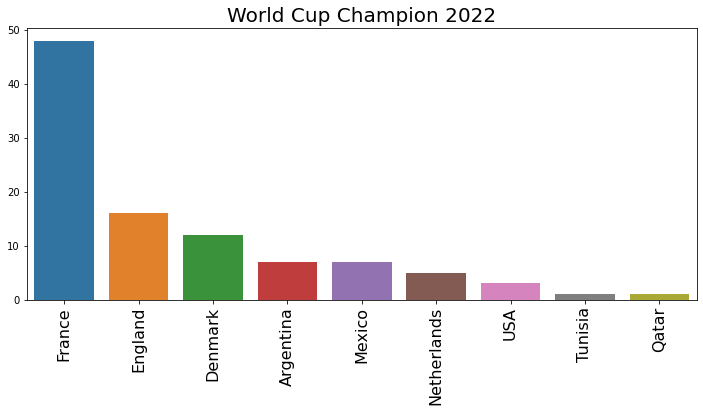

In [39]:
from collections import Counter
import operator
import matplotlib
import seaborn as sns

sorted_champ = Counter(champions).most_common()

fig, ax = plt.subplots(figsize=[12, 5])
plt.xticks(rotation=90, size=16)
ax.set_title('World Cup Champion 2022', size=20)
sns.barplot(x=[t[0] for t in sorted_champ], y=[t[1] for t in sorted_champ], ax=ax)